/tmp/ipykernel_27256/2402556472.py:68: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend(handles, labels=labels, title='Fonti di rumore', loc = 2, bbox_to_anchor=(0.77, 0.955),ncol=2) #interno: 0.77, 0.955


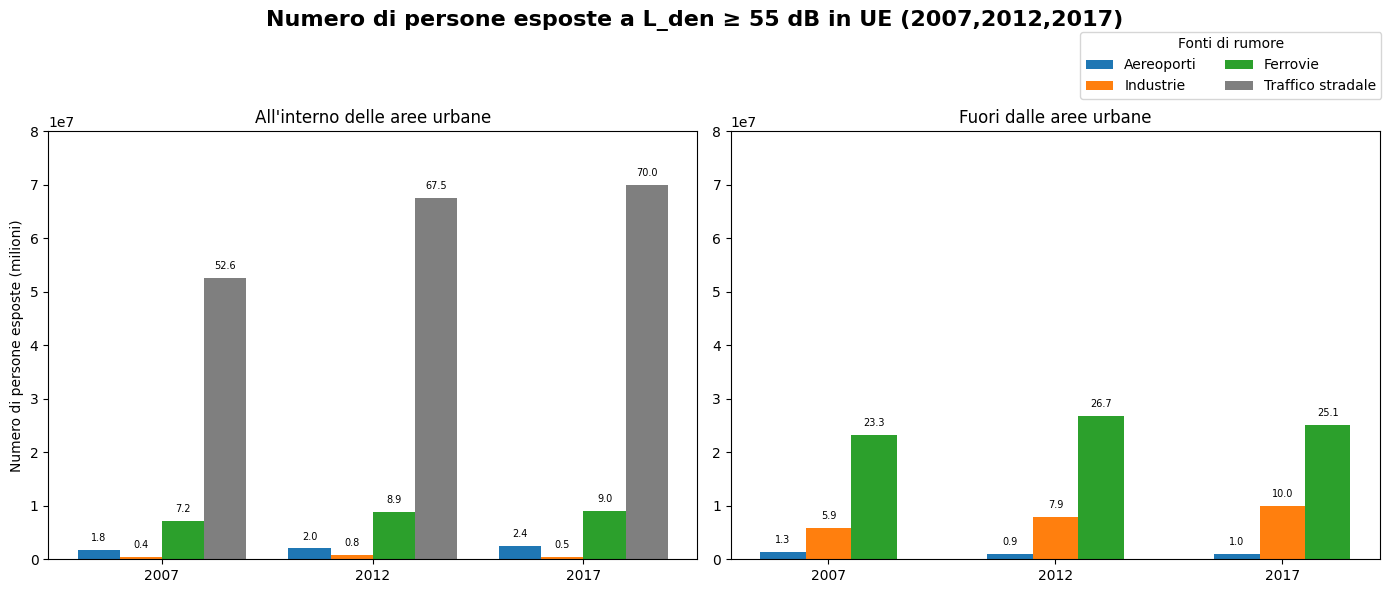

In [1]:
#Grafico sul numero delle persone (milioni), nei paesi europei esposte al rumore dall'indicatore Lden >= 55 dB in aree urbane sia interne sia esterne (2007,2012,2017) 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Carica il CSV con il separatore corretto 
data = pd.read_csv("/home/mile/progetto VS/Dataset/inquinamento acustico/eea_inquinamento_acustico_2007-2012-2017.csv", sep=';')

#Filtrare i dati per le aree urbane interne
data_in = data[(data['Area'] == 'Inside urban areas') & 
                        (data['Year'].isin([2007, 2012, 2017])) &
                        (data['Indicator'] == 'Lden')]

# Pivot dei dati per ottenere le fonti come colonne
data_pivot_in = data_in.pivot_table(index='Year', columns='Source', values='People exposed', aggfunc='sum')

#Imposta grafico
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,6), gridspec_kw={'width_ratios': [1, 1]})

#Definire posizione per le barre e colore
x_in = np.arange(len(data_pivot_in.index))  # Posizioni per gli anni (2007, 2012, 2017)
bar_width = 0.20  # Larghezza di ogni barra

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#7f7f7f']
# Crea il grafico a barre raggruppate per "Inside urban areas"
for i, column in enumerate(data_pivot_in.columns):
    ax1.bar(x_in + i * bar_width, data_pivot_in[column], bar_width, label=column, color=colors[i])

ax1.set_title('All\'interno delle aree urbane')
ax1.set_ylabel('Numero di persone esposte (milioni)')
ax1.set_xticks(x_in + bar_width * (len(data_pivot_in.columns) - 1) / 2)  # Centra le etichette
ax1.set_xticklabels(data_pivot_in.index)
ax1.set_ylim(0, 80000000)  # Imposta una scala comune

# Aggiunta etichette con i valori in milioni
for container in ax1.containers:
    ax1.bar_label(container, labels=[f'{x/1e6:.1f}' for x in container.datavalues], fontsize=7, padding=5)

# Filtra i dati per le aree urbane esterne
data_out = data[(data['Area'] == 'Outside urban areas') & 
                         (data['Year'].isin([2007, 2012, 2017])) &
                         (data['Indicator'] == 'Lden')]

# Pivot dei dati per ottenere le fonti come colonne
data_pivot_out = data_out.pivot_table(index='Year', columns='Source', values='People exposed', aggfunc='sum')

# Definizione delle posizioni per i gruppi di barre
x_out = np.arange(len(data_pivot_out.index))  # Posizioni per gli anni (2007, 2012, 2017)

# Crea il grafico a barre raggruppate per "Outside urban areas"
for i, column in enumerate(data_pivot_out.columns):
    ax2.bar(x_out + i * bar_width, data_pivot_out[column], bar_width, label=column, color=colors[i])

ax2.set_title('Fuori dalle aree urbane')
ax2.set_xticks(x_out + bar_width * (len(data_pivot_out.columns) - 1) / 2)
ax2.set_xticklabels(data_pivot_out.index)
ax2.set_ylim(0, 80000000)

# Aggiunta etichette con i valori in milioni
for container in ax2.containers:
    ax2.bar_label(container, labels=[f'{x/1e6:.1f}' for x in container.datavalues], fontsize=7, padding=5)

# Miglioramento del layout
plt.suptitle('Numero di persone esposte a L_den ≥ 55 dB in UE (2007,2012,2017)', fontsize=16,fontweight='bold')
# Aggiunta di una legenda unificata
handles, labels = ax1.get_legend_handles_labels()
labels = ['Aereoporti','Industrie','Ferrovie','Traffico stradale']
fig.legend(handles, labels=labels, title='Fonti di rumore', loc = 2, bbox_to_anchor=(0.77, 0.955),ncol=2) #interno: 0.77, 0.955
plt.tight_layout(rect=[0, 0, 1, 0.9])
plt.show()


/tmp/ipykernel_27256/4070498374.py:61: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend(handles, labels=labels, title='Fonti di rumore', loc = 2, bbox_to_anchor=(0.77, 0.955),ncol=2) #0.03 a sx o 0.71 a dx #loc=2=upper right


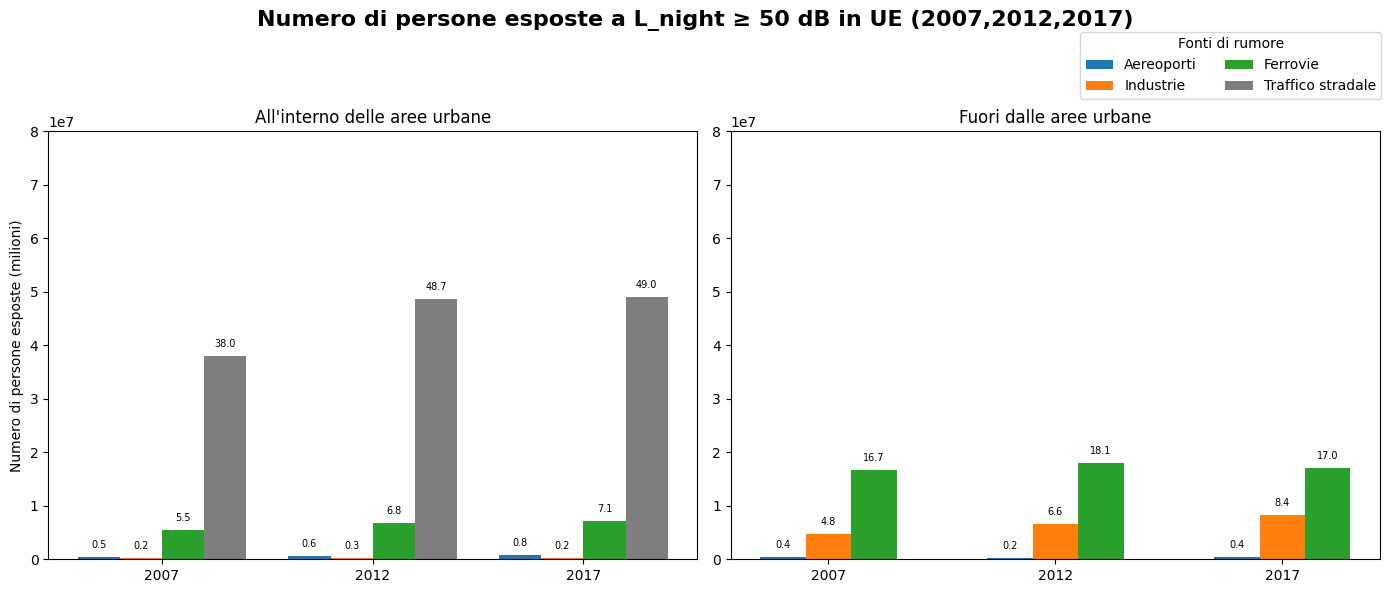

In [2]:
#Grafico sul numero delle persone (milioni), nei paesi europei esposte al rumore dall'indicatore Lnight >= 50 dB in aree urbane sia interne sia esterne (2007,2012,2017)

#Filtrare i dati per le aree urbane interne
data_in = data[(data['Area'] == 'Inside urban areas') & 
                        (data['Year'].isin([2007, 2012, 2017])) &
                        (data['Indicator'] == 'Lnight')]

# Pivot dei dati per ottenere le fonti come colonne
data_pivot_in = data_in.pivot_table(index='Year', columns='Source', values='People exposed', aggfunc='sum')

#Imposta grafico
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,6), gridspec_kw={'width_ratios': [1, 1]})

#Definire posizione per le barre e colore
x_in = np.arange(len(data_pivot_in.index))
bar_width = 0.20
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#7f7f7f']

# Crea il grafico a barre raggruppate per "Inside urban areas"
for i, column in enumerate(data_pivot_in.columns):
    ax1.bar(x_in + i * bar_width, data_pivot_in[column], bar_width, label=column, color=colors[i])

ax1.set_title('All\'interno delle aree urbane')
ax1.set_ylabel('Numero di persone esposte (milioni)')
ax1.set_xticks(x_in + bar_width * (len(data_pivot_in.columns) - 1) / 2)  # Centra le etichette
ax1.set_xticklabels(data_pivot_in.index)
ax1.set_ylim(0, 80000000)  # Imposta una scala comune

# Aggiunta etichette con i valori in milioni
for container in ax1.containers:
    ax1.bar_label(container, labels=[f'{x/1e6:.1f}' for x in container.datavalues], fontsize=7, padding=5)

# Filtra i dati per le aree urbane esterne
data_out = data[(data['Area'] == 'Outside urban areas') & 
                         (data['Year'].isin([2007, 2012, 2017])) &
                         (data['Indicator'] == 'Lnight')]

# Pivot dei dati per ottenere le fonti come colonne
data_pivot_out = data_out.pivot_table(index='Year', columns='Source', values='People exposed', aggfunc='sum')

# Definizione delle posizioni per i gruppi di barre
x_out = np.arange(len(data_pivot_out.index))  # Posizioni per gli anni (2007, 2012, 2017) 
# Crea il grafico a barre raggruppate per "Outside urban areas"
for i, column in enumerate(data_pivot_out.columns):
    ax2.bar(x_out + i * bar_width, data_pivot_out[column], bar_width, label=column, color=colors[i])

ax2.set_title('Fuori dalle aree urbane')
ax2.set_xticks(x_out + bar_width * (len(data_pivot_out.columns) - 1) / 2)
ax2.set_xticklabels(data_pivot_out.index)
ax2.set_ylim(0, 80000000)

# Aggiunta etichette con i valori in milioni
for container in ax2.containers:
    ax2.bar_label(container, labels=[f'{x/1e6:.1f}' for x in container.datavalues], fontsize=7, padding=5)

# Miglioramento del layout
plt.suptitle('Numero di persone esposte a L_night ≥ 50 dB in UE (2007,2012,2017)', fontsize=16, fontweight='bold')
# Aggiunta di una legenda unificata
handles, labels = ax1.get_legend_handles_labels()
labels = ['Aereoporti','Industrie','Ferrovie','Traffico stradale']
fig.legend(handles, labels=labels, title='Fonti di rumore', loc = 2, bbox_to_anchor=(0.77, 0.955),ncol=2) #0.03 a sx o 0.71 a dx #loc=2=upper right
plt.tight_layout(rect=[0, 0, 1, 0.9])
plt.show()
